In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [3]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
df.corr()['fetal_health'].sort_values()

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

<AxesSubplot: >

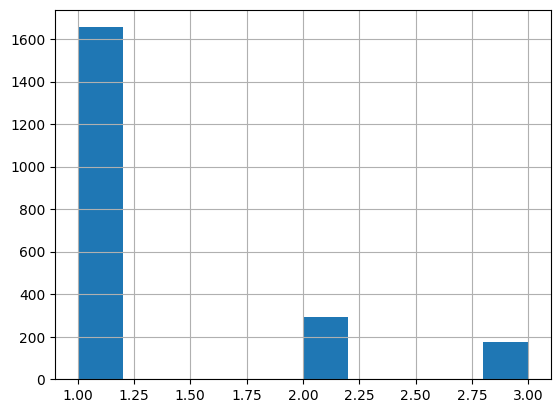

In [5]:
df['fetal_health'].hist()

In [6]:
eda_df = df.copy()

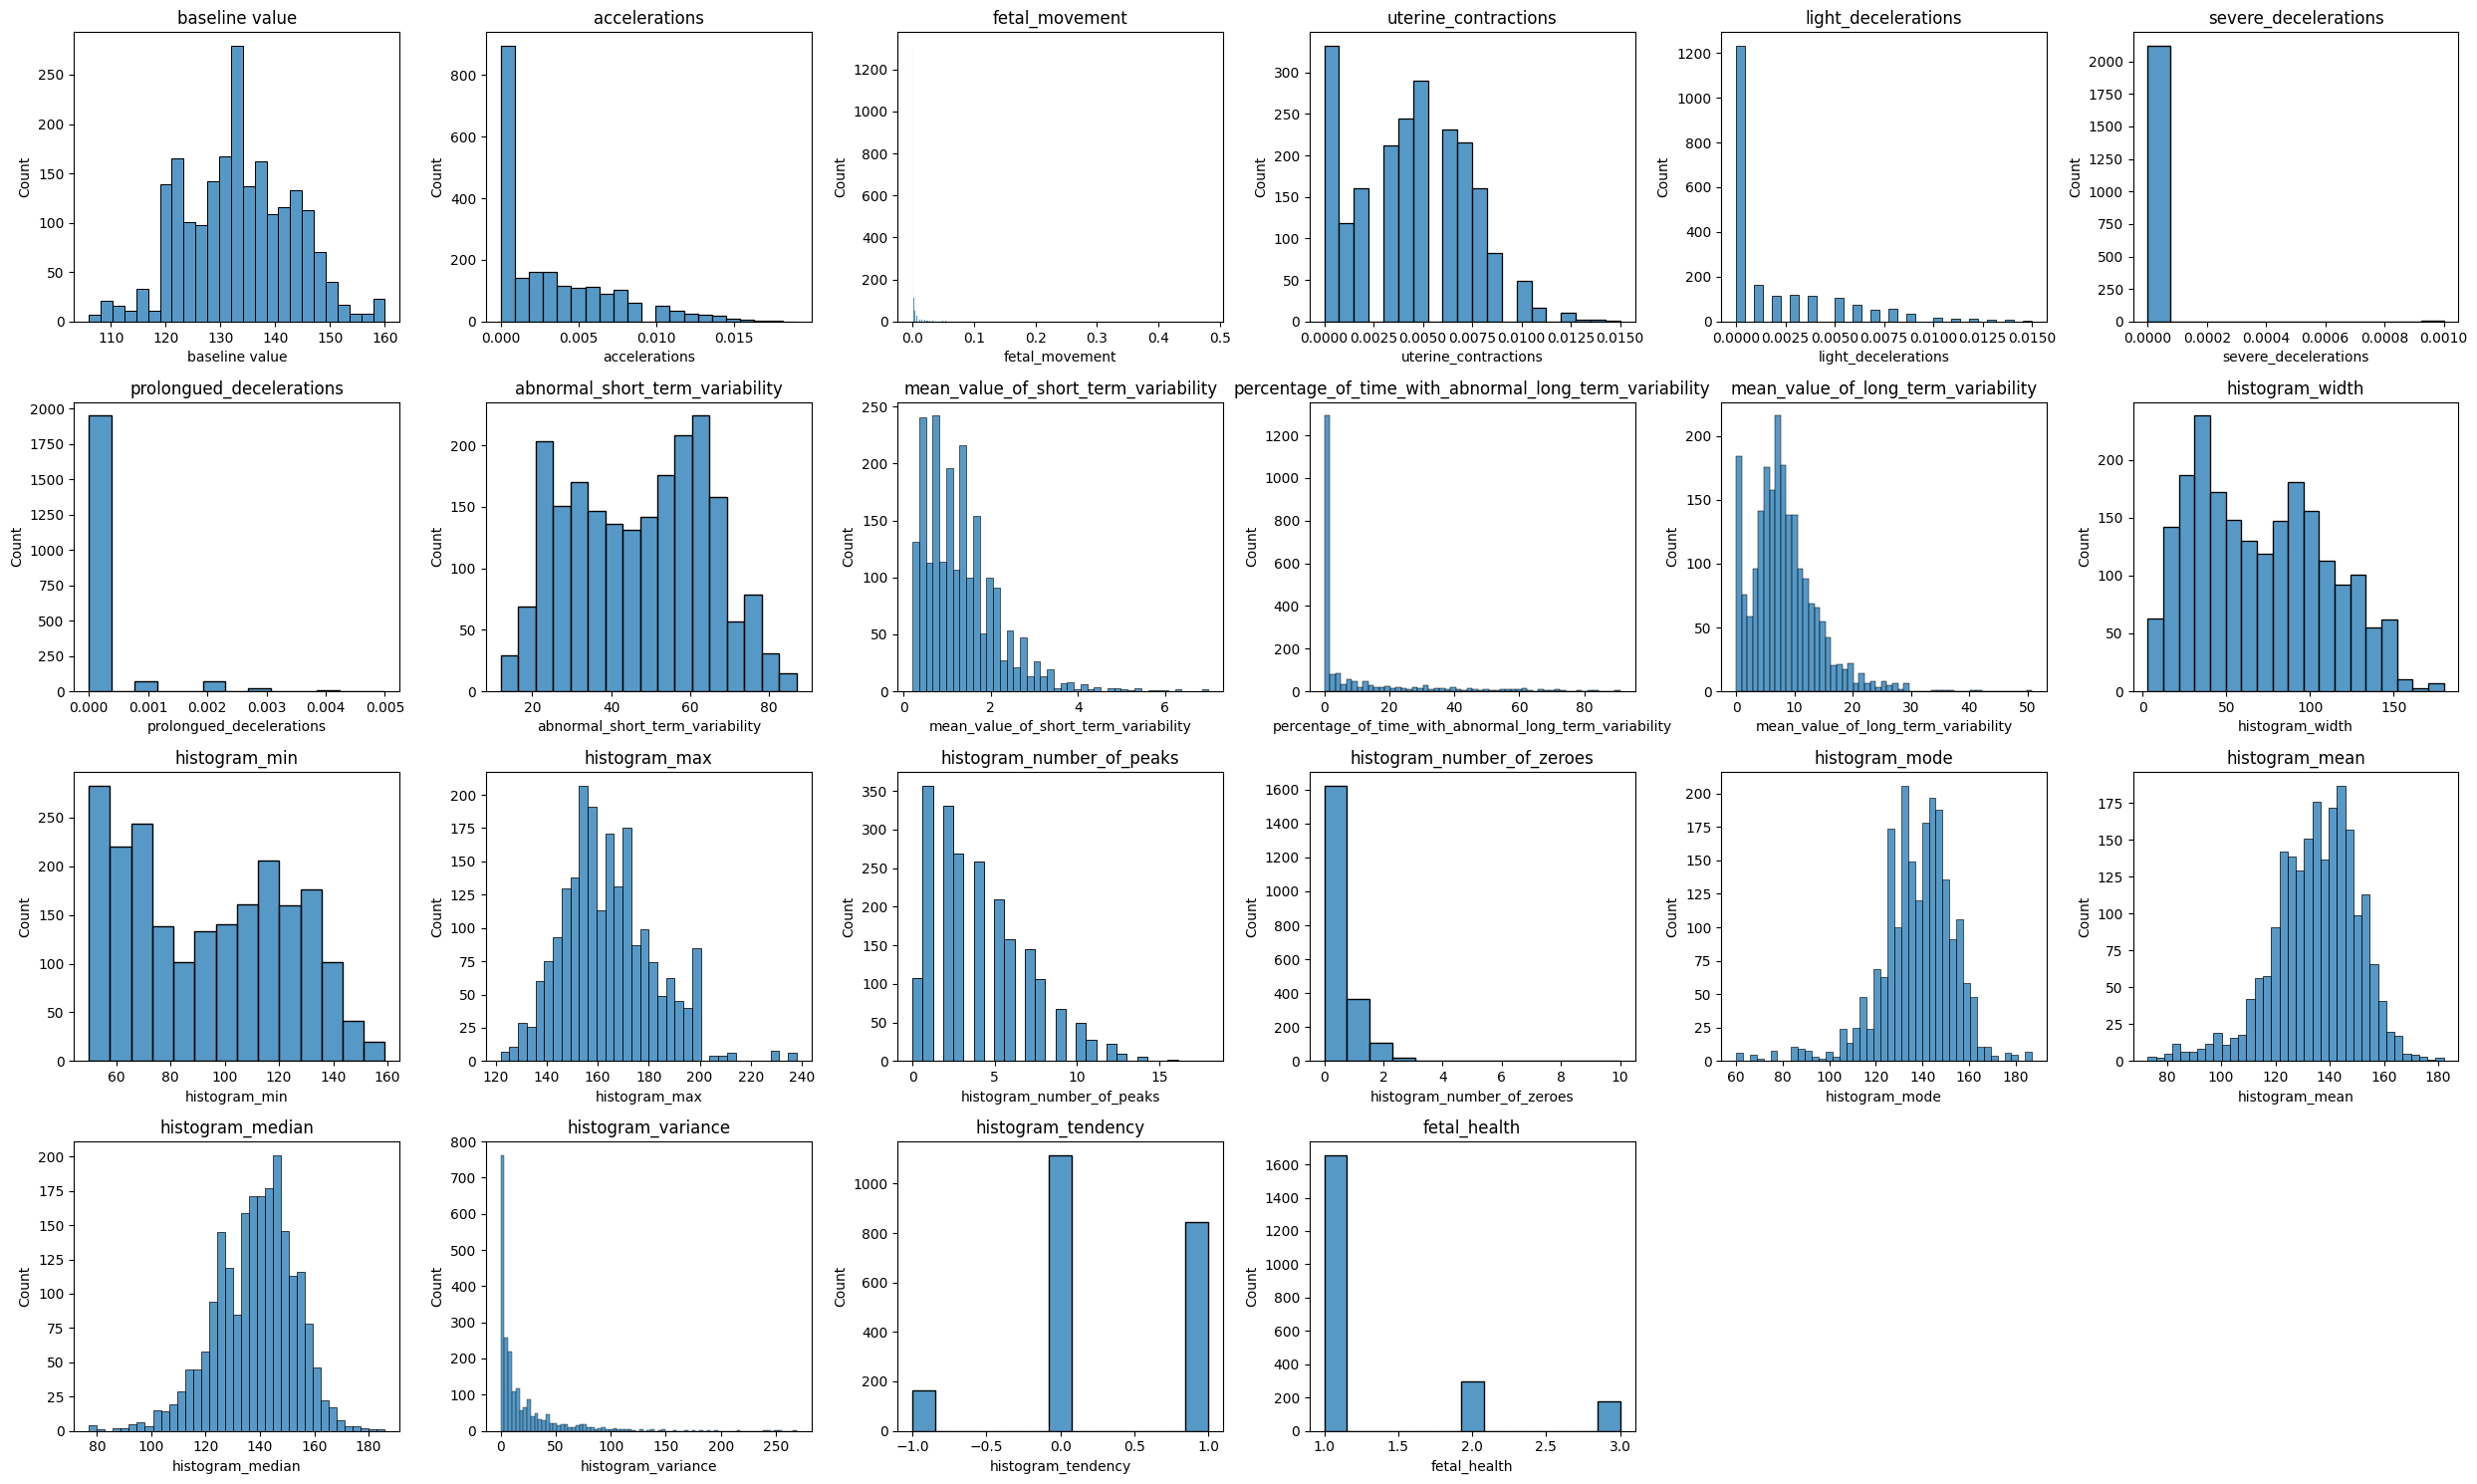

In [7]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

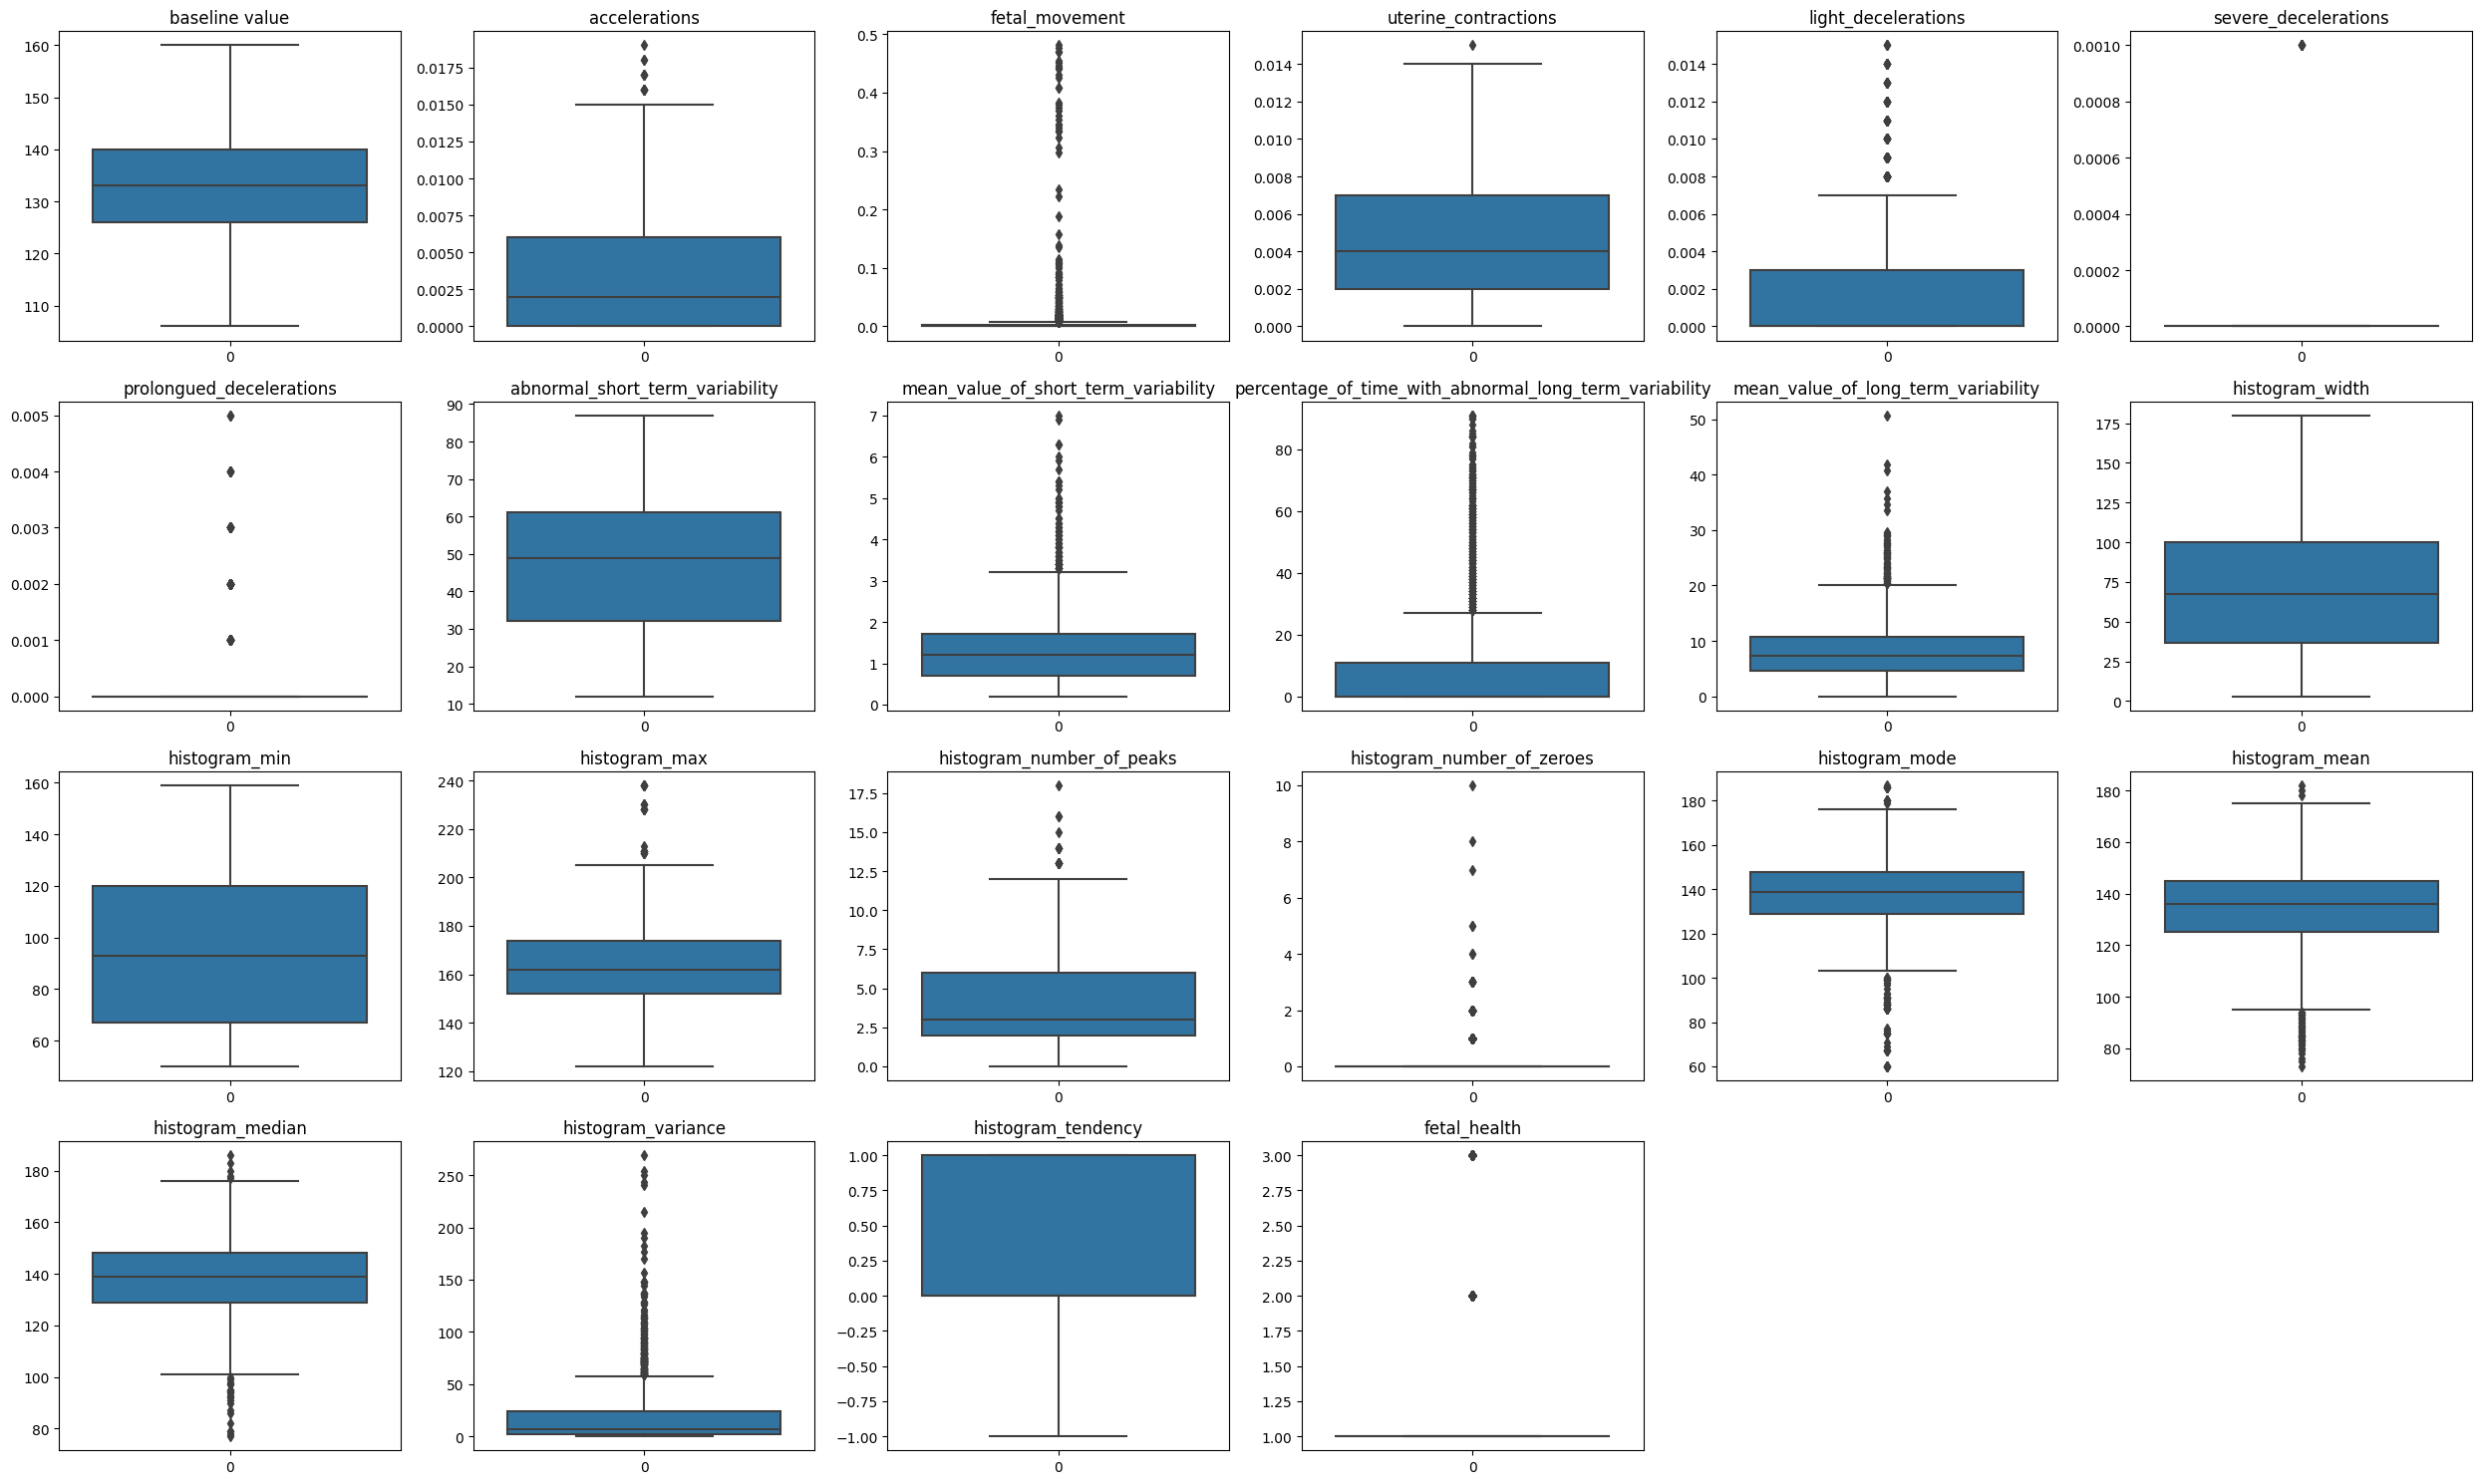

In [8]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [9]:
y = df['fetal_health']
X = df.drop('fetal_health', axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df_mm = mm.fit_transform(X)

In [11]:
df_mm = pd.DataFrame(df_mm, index = X.index, columns = X.columns)

In [12]:
df_mm

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725,...,0.209040,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5
2122,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0
2123,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780,...,0.361582,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0
2124,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0


In [13]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_mm, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)
rf_pred = rf.predict(test_X)


In [15]:
from sklearn.metrics import f1_score, accuracy_score
f1_rf = f1_score(test_y, rf_pred, average='weighted')
print(f1_rf)
acc_rf = accuracy_score(test_y, rf_pred)
print(acc_rf)

0.9445233558598942
0.9460093896713615


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_X, train_y)
knn_pred = knn.predict(test_X)
knn_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 3., 3., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 1., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [17]:
f1_knn = f1_score(test_y, knn_pred, average='weighted')
print(f1_knn)
acc_knn = accuracy_score(test_y, knn_pred)
print(acc_knn)

0.9080215925637745
0.9131455399061033


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)
gbc_pred = gbc.predict(test_X)
gbc_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 1., 3., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 3., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 3., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1.

In [19]:
f1_gbc = f1_score(test_y, gbc_pred, average='weighted')
print(f1_gbc)
acc_gbc = accuracy_score(test_y, gbc_pred)
print(acc_gbc)

0.9457627953513429
0.9460093896713615


<BarContainer object of 3 artists>

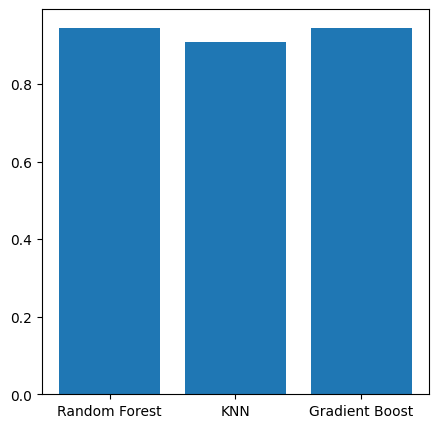

In [20]:
plt.figure(figsize=(5,5))
labels = ['Random Forest', 'KNN', 'Gradient Boost']
acc = [f1_rf, f1_knn, f1_gbc]
plt.bar(labels, acc)

In [50]:
corr_matrix = df.corr()[['fetal_health']].sort_values(by='fetal_health')

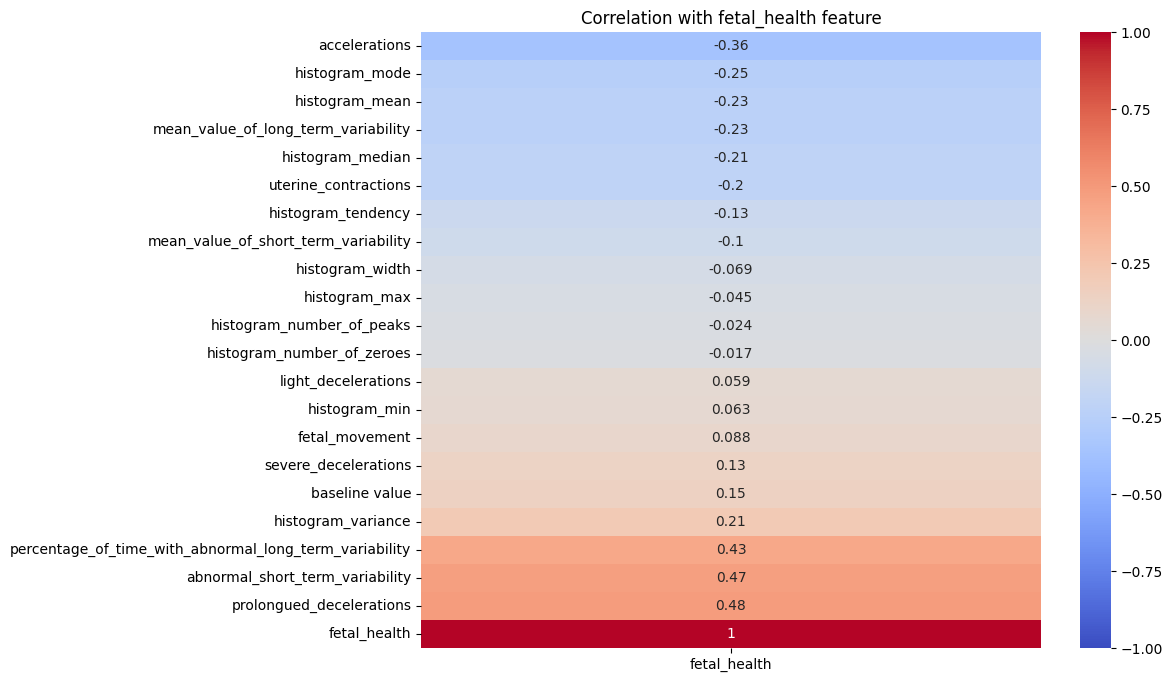

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with fetal_health feature')
plt.savefig(fname='corr_fig.jpg')
plt.show()

In [22]:
#removed couple of the least correlated features to see if the performance increases
chosen = df_mm.drop(['histogram_number_of_zeroes', 'histogram_number_of_peaks', 'light_decelerations','histogram_max'], axis=1)


train_X_ch, test_X_ch, train_y, test_y = train_test_split(chosen, y, test_size=0.2, random_state=42)


In [26]:
knn.fit(train_X_ch, train_y)
knn_ch = knn.predict(test_X_ch)
f1_knn_ch = f1_score(test_y, knn_ch, average='weighted')
print(f1_knn_ch)
acc_knn_ch = accuracy_score(test_y, knn_ch)
print(acc_knn_ch)

0.9106343706817577
0.9154929577464789


In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X_ch, train_y)
rf_ch_pred = rf.predict(test_X_ch)
f1_rf_ch = f1_score(test_y, rf_ch_pred, average='weighted')
print(f1_rf_ch)
acc_rf_ch = accuracy_score(test_y, rf_ch_pred)
print(acc_rf_ch)


0.9524661403036503
0.9530516431924883


In [29]:
#Random Forest Improved to 95% after removing least correlated features

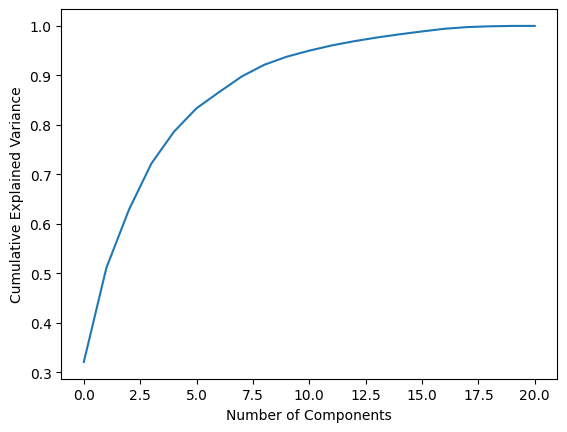

In [31]:
#KNN Looks promising, let's see if we can improve it by performing some feature engineering
from sklearn.decomposition import PCA

pca = PCA().fit(df_mm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [32]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_mm)
pca_df = pd.DataFrame(df_pca, index = df_mm.index)
pca_df


,0,1,2,3,4,5,6,7,8,9
0,-0.124537,-0.147696,-0.703329,0.094361,-0.357170,-0.232448,0.157297,-0.057918,0.028319,-0.157068
1,0.535457,0.003731,0.378646,-0.049223,-0.011393,0.208109,0.106487,-0.076414,-0.075349,-0.071608
2,0.525675,0.037819,0.319870,0.001700,0.127113,0.291790,0.049659,-0.174583,-0.081047,-0.124556
3,0.643625,-0.383149,0.064835,0.249183,0.087987,0.252253,0.034191,-0.265309,-0.041840,0.148622
4,0.582850,-0.403692,0.222756,0.289410,-0.036096,0.077018,0.071676,-0.309663,0.028877,0.038948
...,...,...,...,...,...,...,...,...,...,...
2121,-0.588361,0.081234,-0.002282,-0.337490,0.241843,-0.078485,-0.081909,-0.213687,-0.057173,0.104089
2122,-0.289770,-0.381822,-0.208044,-0.191295,0.181451,-0.187237,-0.076544,-0.259299,-0.017520,0.109880
2123,-0.299154,-0.380797,-0.201056,-0.192989,0.192054,-0.205584,-0.097868,-0.237191,-0.017498,0.066269
2124,-0.311285,-0.386063,-0.237532,-0.211901,0.126827,-0.163709,-0.037224,-0.238538,-0.015536,0.103341


In [33]:
train_X_pca, test_X_pca, train_y, test_y = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [34]:
rf.fit(train_X_pca, train_y)
pca_pred = rf.predict(test_X_pca)
f1_rf_pca = f1_score(test_y, pca_pred, average='weighted')
print(f1_rf_pca)
acc_rf_pca = accuracy_score(test_y, pca_pred)
print(acc_rf_pca)

0.9177680526510972
0.92018779342723


In [58]:
#parameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': np.arange(50, 151, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}
random_search = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
random_search.fit(train_X_ch, train_y)
best_params = random_search.best_params_
best_params

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [67]:
rf = RandomForestClassifier(n_estimators= 110,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='log2',
 max_depth=30, random_state=42)
rf.fit(train_X_ch, train_y)
rf_b_pred = rf.predict(test_X_ch)
f1_rf_b = f1_score(test_y, rf_b_pred, average='weighted')
print(f1_rf_b)
acc_rf_b = accuracy_score(test_y, rf_b_pred)
print(acc_rf_b)

0.9547366428304194
0.9553990610328639


array([0.04760742, 0.05240955, 0.02174151, 0.03850323, 0.0009865 ,
       0.03981866, 0.15147164, 0.11206659, 0.13799978, 0.04858676,
       0.03616683, 0.03801734, 0.06556008, 0.12364805, 0.04947731,
       0.02781294, 0.00812582])

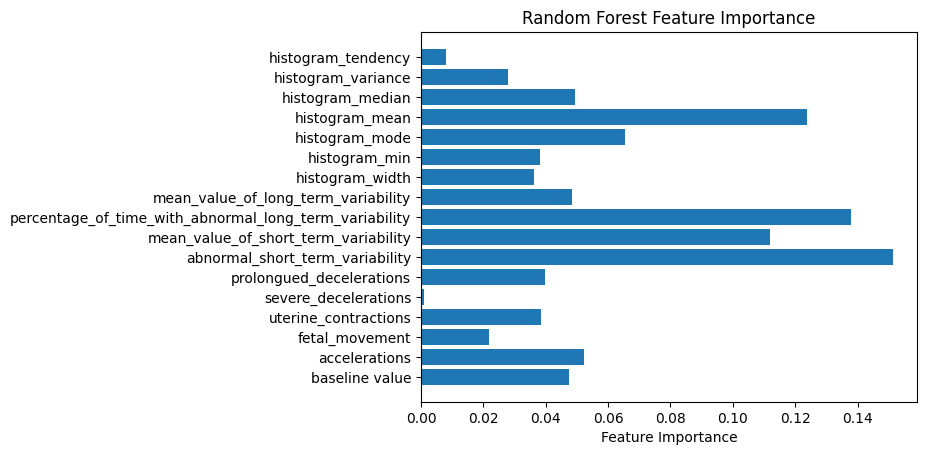

In [65]:

feature_importances = rf.feature_importances_
feature_names = train_X_ch.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


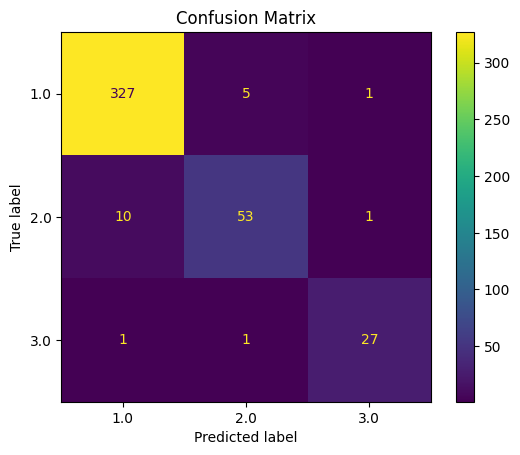

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, rf_b_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.savefig(fname='confusion.jpg')